#### Extract Dataset from ZIP File

In [42]:
import zipfile

zip_path = "alpha.zip"  
extract_path = "./"         

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
    
print("Extraction completed!")

Extraction completed!


#### Import Required Libraries for Deep Learning and Image Processing

In [67]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping
import os
import numpy as np  

#### Dataset Configuration

In [44]:
data_dir = 'alpha'
img_width, img_height = 204, 197
batch_size = 32

#### Data Preprocessing and Augmentation

In [51]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3440 images belonging to 43 classes.
Found 859 images belonging to 43 classes.


#### Building the Convolutional Neural Network (CNN) Model

In [52]:
class_names = ['alef', 'b', 'p', 't', 'se', 'jim', 'che', 'h', 'kh', 'd', 'zal', 'r', 'z', 'zh', 'sin', 'shin', 'sad', 'zad', 't-long', 'z-long', 'ayin', 'ghyin', 'f', 'ghe', 'k', 'g', 'le', 'm', 'n', 'v', 'he', 'ye', 'zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'anewfive']

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


#### Training the CNN Model

In [68]:
steps_per_epoch = int(np.ceil(train_generator.samples / batch_size))
validation_steps = int(np.ceil(validation_generator.samples / batch_size))

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=20,  
    callbacks=[early_stop]
)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.9733 - loss: 0.0795 - val_accuracy: 0.9395 - val_loss: 0.2467
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.9799 - loss: 0.0608 - val_accuracy: 0.9336 - val_loss: 0.2773
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.9820 - loss: 0.0549 - val_accuracy: 0.9453 - val_loss: 0.2190
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.9910 - loss: 0.0280 - val_accuracy: 0.9406 - val_loss: 0.2506
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.9884 - loss: 0.0416 - val_accuracy: 0.9453 - val_loss: 0.2932
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.9904 - loss: 0.0305 - val_accuracy: 0.9569 - val_loss: 0.2651


#### Evaluating the Model Performance

In [69]:
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Validation loss: {loss}')
print(f'Validation accuracy: {accuracy}')

26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 265ms/step - accuracy: 0.9447 - loss: 0.2205 
Validation loss: 0.22046732902526855
Validation accuracy: 0.9447115659713745


#### Importing Visualization and Image Processing Libraries

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#### Display Class Indices

In [71]:
class_indices = train_generator.class_indices
print(class_indices)

{'1-alef': 0, '10-d': 1, '11-zal': 2, '12-r': 3, '13-z': 4, '14-zh': 5, '15-sin': 6, '16-shin': 7, '17-sad': 8, '18-zad': 9, '19-t-long': 10, '2-b': 11, '20-z-long': 12, '21-ayin': 13, '22-ghyin': 14, '23-f': 15, '24-ghe': 16, '25-k': 17, '26-g': 18, '27-le': 19, '28-m': 20, '29-n': 21, '3-p': 22, '30-v': 23, '31-he': 24, '32-ye': 25, '33-zero': 26, '34-one': 27, '35-two': 28, '36-three': 29, '37-four': 30, '38-five': 31, '39-six': 32, '4-t': 33, '40-seven': 34, '41-eight': 35, '42-nine': 36, '43-anewfive': 37, '5-se': 38, '6-jim': 39, '7-che': 40, '8-h': 41, '9-kh': 42}


#### Predicting and Visualizing Handwritten Characters

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


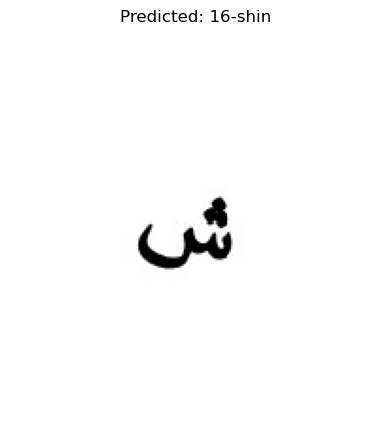

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


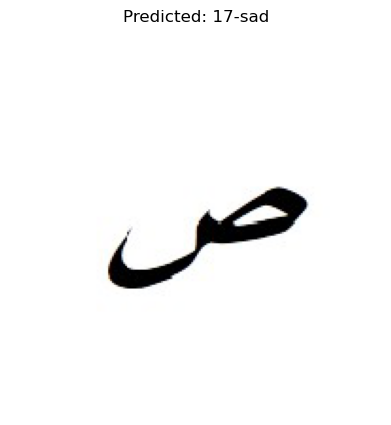

In [73]:
class_indices = ['1-alef', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '2-b', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '3-p', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '4-t', '40-seven', '41-eight', '42-nine', '43-anewfive', '5-se', '6-jim', '7-che', '8-h', '9-kh']

def predict_and_display(model, image_path, class_names):
    img_width, img_height = 204, 197
    image = load_img(image_path, target_size=(img_width, img_height))
    img_array = img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = class_indices[np.argmax(prediction)]

    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()

predict_and_display(model, 'shin-test.jpg', class_names)  # shin
predict_and_display(model, '/sad-test.jpg', class_names)  # sad